### **EJEMPLO 4A**: TRABAJO SOBRE LA CINTA (P1)

In [ ]:
import cv2
import matplotlib.pyplot as plt

#### **BORRADOR PARA COORDENADAS DE LA CINTA**

In [17]:
# video en vivo
cap = cv2.VideoCapture(1)

# este código es para darle tiempo a la camara para que caliente, luego captura una imagen.
c = 0
while (c<20):
    c += 1
    _, img = cap.read()
_, img = cap.read()
cap.release()

In [ ]:
# video desde archivo

#cap = cv2.VideoCapture('cinta1.mov')

#cap.set(cv2.CAP_PROP_POS_FRAMES, 630)
#_, img = cap.read()

#cap.release()

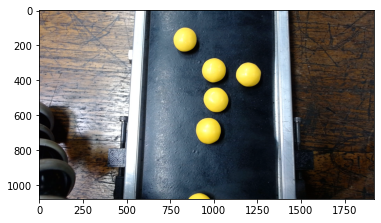

In [18]:
# muestra la imagen completa
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

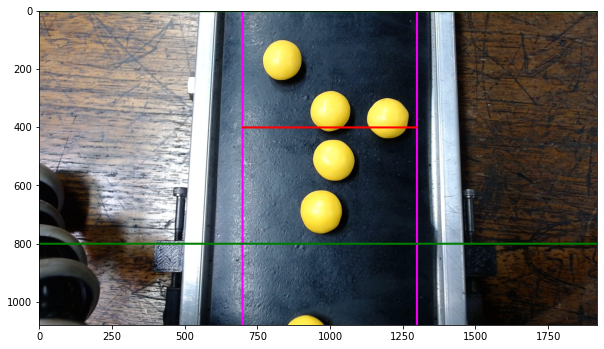

In [19]:
# determino la región de interes

img_c = img.copy()

# recorte vertical
x1 = 700
x2 = 1300
# recorte horizontal
y1 = 0
y2 = 800
# láser imaginario
yL = 400


frame = cv2.line(img_c, (x1,0),(x1, img_c.shape[0]), (255,0,255), 5)
frame = cv2.line(img_c, (x2,0),(x2, img_c.shape[0]), (255,0,255), 5)
frame = cv2.line(img_c, (0,y1),(img_c.shape[1], y1), (0,125,0), 5)
frame = cv2.line(img_c, (0,y2),(img_c.shape[1], y2), (0,125,0), 5)
frame = cv2.line(img_c, (x1,yL),(x2, yL), (0,0,255), 5)


plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 
plt.show()


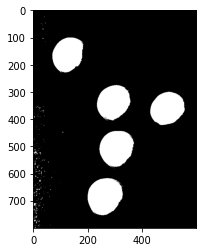

In [23]:
# determino el umbral para la binarización

th = 190

img_r = img[y1:y2,x1:x2,:]

gray = cv2.cvtColor(img_r, cv2.COLOR_BGR2GRAY)

_, threshold = cv2.threshold(gray, th, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB)) 
plt.show()

objetos encontrados: 212

area objeto #1: 13347.0
ancho: 129 / largo: 137

area objeto #2: 12570.5
ancho: 126 / largo: 133

area objeto #3: 11494.5
ancho: 126 / largo: 122

area objeto #4: 11739.5
ancho: 123 / largo: 130

area objeto #5: 11064.0
ancho: 115 / largo: 129



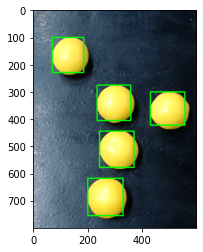

In [24]:
# detecto y mido el tamaño del objeto

img_f = img[y1:y2,x1:x2,:]

contours, _= cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

print("objetos encontrados:", len(contours))
print("")
o = 1
for c in contours:
    a = cv2.contourArea(c)
    if a > 10000:
        print(f"area objeto #{o}: {a}")
        (x, y, w, h) = cv2.boundingRect(c)
        print(f"ancho: {w} / largo: {h}")
        print("")
        # dibuja rectangulo 
        cv2.rectangle(img_f, (x,y), (x+w, y+h), (0,255,0), 4)
        o += 1
    
plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB)) 
plt.show()
